### **Context**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named **‘Traveldata_train.csv’**.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled **‘Surveydata_train.csv’**.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled **‘Overall_Experience’**. 

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

### **Goal:**
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

### **Dataset:**

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

- Train_Data
- Test_Data

**Target Variable:** Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The **training set** can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The **testing set** should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.


### **Submission File**
**Submission File Format:** You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

- **ID** The unique ID of the passenger
- **Overall_Experience** (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)


### **Data Dictionary:**
The survey levels are explained below:

- **ID**	The unique ID of the passenger	Continuous values like 98800001, 98800002, etc.

- **Gender**	The gender of the passenger	"Male
Female"

- **Customer_Type**	Loyalty type of the passenger	"Loyal Customer
Disloyal Customer"

- **Age**	The age of the passenger	Continuous values like 48, 52, 9, etc.

- **Type_Travel**	Purpose of travel for the passenger	"Personal Travel
Business Travel"
- **Travel_Class**   The train class that the passenger traveled in	"Business
Eco"

- **Travel_Distance** 	The distance traveled by the passenger	Continuous values like 272, 780, 853, etc.

- **Departure_Delay_in_Mins**	The delay (in minutes) in train departure	Continuous values like 9, 15, 13, etc.

- **Arrival_Delay_in_Mins**	The delay (in minutes) in train arrival	Continuous values like 0, 15, 18, etc.

### **Evaluation Criteria:**

**Accuracy Score:** The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.
 
In other words, the best possible accuracy is 100% (or 1) and the worst possible accuracy 0%. 

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import zipfile
from PIL import Image
# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, LeakyReLU,GlobalAveragePooling2D,Activation
from tensorflow.keras.layers import LeakyReLU,SeparableConv2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

Load dataset

In [ ]:
train_travel='Traveldata_train.csv'
df_train_travel=pd.read_csv(train_travel)

In [ ]:
df_train_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
df_train_travel.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [ ]:
df_train_travel.isnull().count()

ID                         94379
Gender                     94379
Customer_Type              94379
Age                        94379
Type_Travel                94379
Travel_Class               94379
Travel_Distance            94379
Departure_Delay_in_Mins    94379
Arrival_Delay_in_Mins      94379
dtype: int64

In [ ]:
train_survey='Surveydata_train.csv'
df_train_survey=pd.read_csv(train_survey)

In [ ]:
df_train_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
df_train_survey.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
df_train_survey.isnull().count()

ID                         94379
Overall_Experience         94379
Seat_Comfort               94379
Seat_Class                 94379
Arrival_Time_Convenient    94379
Catering                   94379
Platform_Location          94379
Onboard_Wifi_Service       94379
Onboard_Entertainment      94379
Online_Support             94379
Ease_of_Online_Booking     94379
Onboard_Service            94379
Legroom                    94379
Baggage_Handling           94379
CheckIn_Service            94379
Cleanliness                94379
Online_Boarding            94379
dtype: int64

In [ ]:
# Merge two datasets to a comprehensive trainset
df_train=df_train_travel.merge(df_train_survey,on='ID')

In [ ]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
test_travel='Traveldata_test.csv'
df_test_travel=pd.read_csv(test_travel)

In [ ]:
df_test_travel.isnull().count()

ID                         35602
Gender                     35602
Customer_Type              35602
Age                        35602
Type_Travel                35602
Travel_Class               35602
Travel_Distance            35602
Departure_Delay_in_Mins    35602
Arrival_Delay_in_Mins      35602
dtype: int64

In [ ]:
test_survey='Surveydata_test.csv'
df_test_survey=pd.read_csv(test_survey)

In [ ]:
df_test_survey.isnull().count()

ID                         35602
Seat_Comfort               35602
Seat_Class                 35602
Arrival_Time_Convenient    35602
Catering                   35602
Platform_Location          35602
Onboard_Wifi_Service       35602
Onboard_Entertainment      35602
Online_Support             35602
Ease_of_Online_Booking     35602
Onboard_Service            35602
Legroom                    35602
Baggage_Handling           35602
CheckIn_Service            35602
Cleanliness                35602
Online_Boarding            35602
dtype: int64

In [ ]:
# Merge two datasets to a comprehensive testset
df_test=df_test_travel.merge(df_test_survey,on='ID')
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


### **Data Wrangling**

In [ ]:
df_train.dtypes

ID                           int64
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Overall_Experience           int64
Seat_Comfort                object
Seat_Class                  object
Arrival_Time_Convenient     object
Catering                    object
Platform_Location           object
Onboard_Wifi_Service        object
Onboard_Entertainment       object
Online_Support              object
Ease_of_Online_Booking      object
Onboard_Service             object
Legroom                     object
Baggage_Handling            object
CheckIn_Service             object
Cleanliness                 object
Online_Boarding             object
dtype: object

In [ ]:
# Create a list that have all numerical variables
s=((df_train.dtypes=='float64') | (df_train.dtypes=='int64'))
num_cols=list(s[s].index)

In [ ]:
num_cols

['ID',
 'Age',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience']

### **Transform categorical variables**

In [ ]:
cal_ord_cols=["Platform_Location","Seat_Comfort","Arrival_Time_Convenient","Catering","Onboard_Wifi_Service","Onboard_Entertainment","Online_Support","Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness","Online_Boarding"]

In [ ]:
cal_ohe_cols=[]
for col in df_train.columns:
  if (col not in num_cols) and (col not in cal_ord_cols):
    cal_ohe_cols.append(col)

cal_ohe_cols

['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']

In [ ]:
df_train.set_index("ID",inplace=True)

In [ ]:
df_test.set_index("ID",inplace=True)

In [ ]:
#After checking the null value of the combined training dataset, we find some columns contain missing values
sum(df_train.isnull().values.ravel())

44597

In [ ]:
df_train.isnull().sum()

Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
df_test.isnull().sum()

Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# cat_1={"Very Inconvenient":1,
# "Inconvenient":2,
# "Needs Improvement":3,
# "Manageable":4,
# "Convenient":5,
# "Very Convenient":6,
# "NaN":0}
# cat_2={"Extremely Poor":1,
# "Poor":2,
# "Needs Improvement":3,
# "Acceptable":4,
# "Good":5,
# "Excellent":6,
# "NaN":0}

# df_train["Platform_Location"]=df_train["Platform_Location"].map(cat_1)

In [ ]:
# for col in cal_ord_cols:
#   if col!="Platform_Location":
#     df_train["odl_"+col]=df_train[col].map(cat_2)


In [ ]:
df_train.dtypes

Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Overall_Experience           int64
Seat_Comfort                object
Seat_Class                  object
Arrival_Time_Convenient     object
Catering                    object
Platform_Location           object
Onboard_Wifi_Service        object
Onboard_Entertainment       object
Online_Support              object
Ease_of_Online_Booking      object
Onboard_Service             object
Legroom                     object
Baggage_Handling            object
CheckIn_Service             object
Cleanliness                 object
Online_Boarding             object
dtype: object

In [ ]:
num_cols=["Age","Travel_Distance","Departure_Delay_in_Mins","Arrival_Delay_in_Mins"]

In [ ]:
# Construct a Pipeline from estimators and One-hot encoding the categorical variable 
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
import numpy as np

num_transformer_odl = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

categorical_transformer_odl = make_pipeline(
    SimpleImputer(strategy='most_frequent',missing_values=np.nan),
    OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
)

categorical_transformer_ohe = make_pipeline(
    SimpleImputer(strategy='most_frequent',missing_values=np.nan),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (num_transformer_odl, num_cols),
    (categorical_transformer_odl, cal_ord_cols)
    # (categorical_transformer_ohe, cal_ohe_cols)
    )


preprocess_y=make_column_transformer(
    (categorical_transformer_ohe, ["Overall_Experience"])
    )

In [ ]:
# Training dataset drop the label
df_train_f=df_train.drop(columns=["Overall_Experience"],axis=1)
df_train_f.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [ ]:
# le = LabelEncoder()
# df_train_f[cal_ohe_cols] = df_train_f[cal_ohe_cols].apply(lambda col: le.fit_transform(col))
df_train_f = pd.get_dummies(df_train_f, columns = cal_ohe_cols)

In [ ]:
df_train_f[num_cols+cal_ord_cols]=preprocessor.fit_transform(df_train_f)

In [ ]:
df_train_f.shape

(94379, 28)

In [ ]:
df_train_f.columns

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins', 'Seat_Comfort', 'Arrival_Time_Convenient',
       'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
       'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
       'Cleanliness', 'Online_Boarding', 'Gender_Female', 'Gender_Male',
       'Customer_Type_Disloyal Customer', 'Customer_Type_Loyal Customer',
       'Type_Travel_Business Travel', 'Type_Travel_Personal Travel',
       'Travel_Class_Business', 'Travel_Class_Eco', 'Seat_Class_Green Car',
       'Seat_Class_Ordinary'],
      dtype='object')

In [ ]:
y_train=pd.get_dummies(df_train, columns =["Overall_Experience"])
y_train=y_train["Overall_Experience_1"]

In [ ]:
y_train.shape

(94379,)

In [ ]:
df_test.dtypes

Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Seat_Comfort                object
Seat_Class                  object
Arrival_Time_Convenient     object
Catering                    object
Platform_Location           object
Onboard_Wifi_Service        object
Onboard_Entertainment       object
Online_Support              object
Ease_of_Online_Booking      object
Onboard_Service             object
Legroom                     object
Baggage_Handling            object
CheckIn_Service             object
Cleanliness                 object
Online_Boarding             object
dtype: object

In [ ]:
df_test_f = pd.get_dummies(df_test, columns = cal_ohe_cols)

In [ ]:
df_test_f.shape

(35602, 28)

In [ ]:
df_test_f[num_cols+cal_ord_cols]=preprocessor.fit_transform(df_test_f)
# y_test=preprocess_y.fit_transform(df_test)

Age
Skew : -0.0


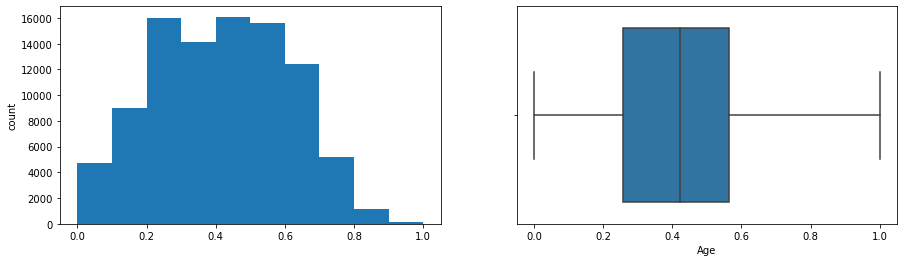

Travel_Distance
Skew : 0.47


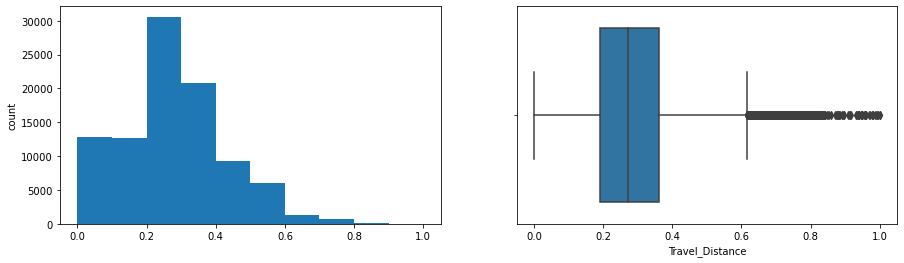

Departure_Delay_in_Mins
Skew : 7.16


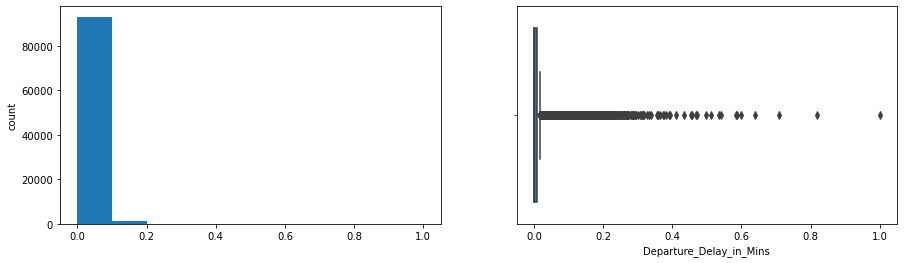

Arrival_Delay_in_Mins
Skew : 6.99


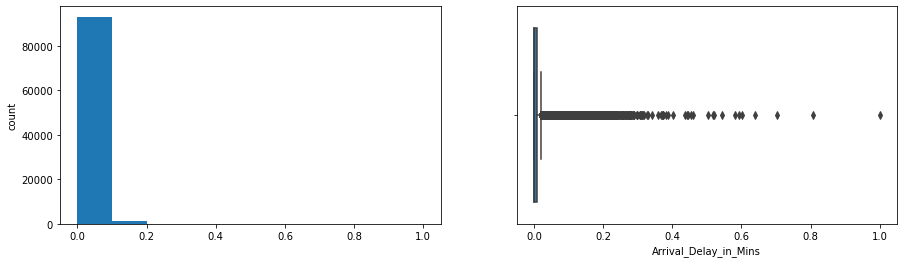

Seat_Comfort
Skew : -0.21


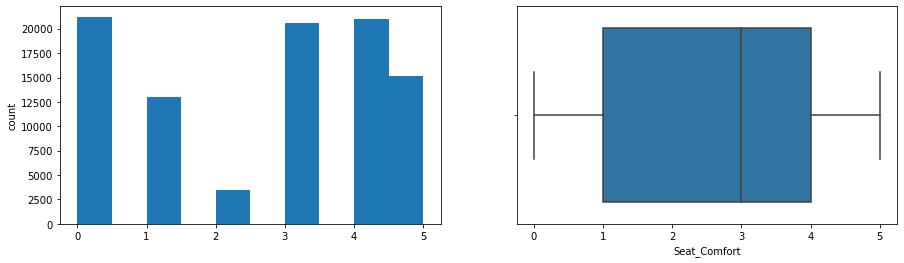

Arrival_Time_Convenient
Skew : -0.15


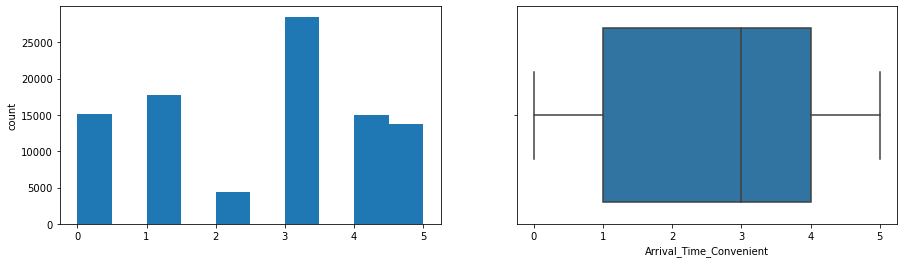

Catering
Skew : 0.02


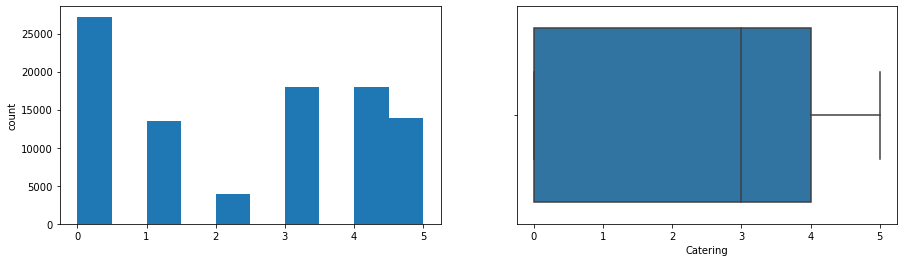

Platform_Location
Skew : 0.08


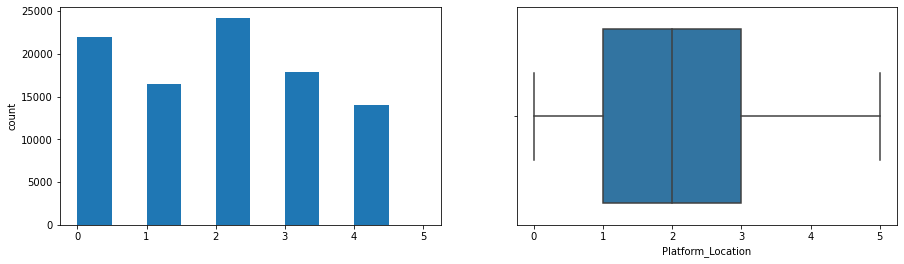

Onboard_Wifi_Service
Skew : -0.04


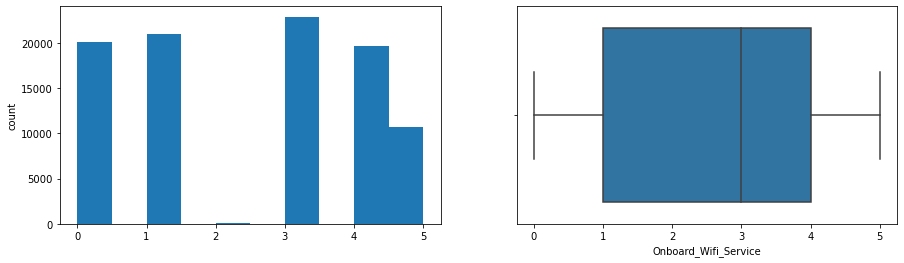

Onboard_Entertainment
Skew : -0.01


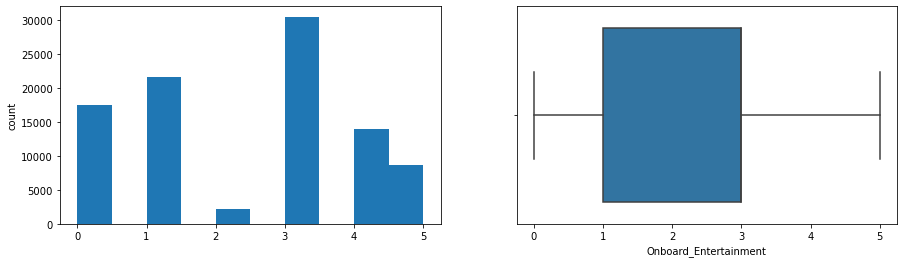

Online_Support
Skew : 0.06


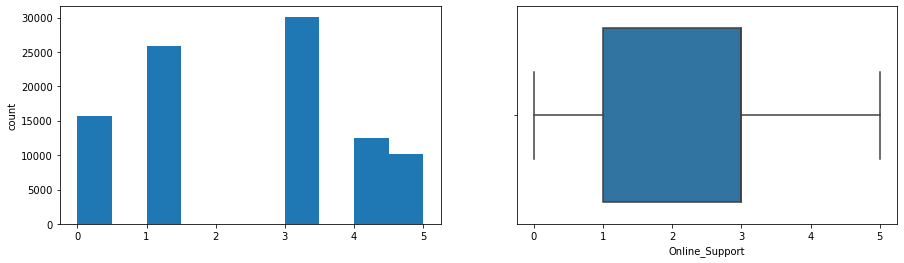

Ease_of_Online_Booking
Skew : 0.02


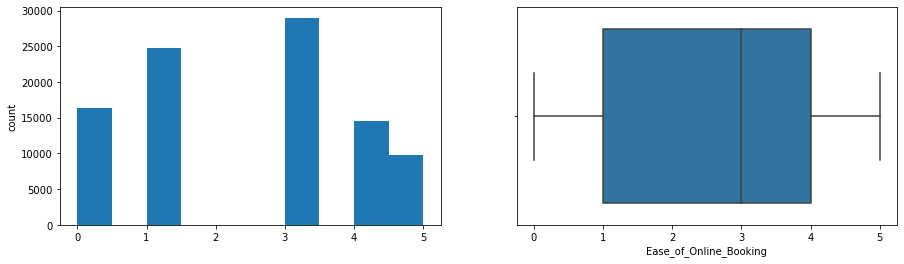

Onboard_Service
Skew : -0.03


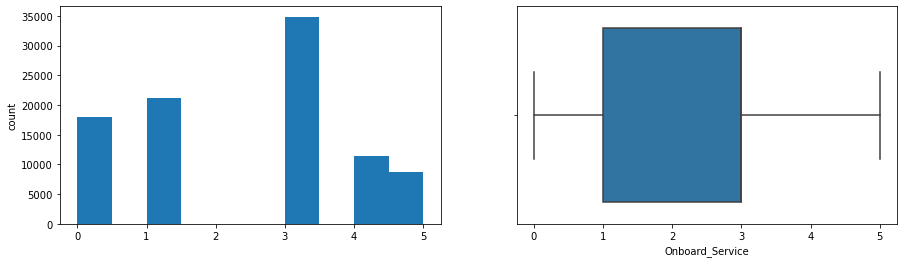

Legroom
Skew : 0.0


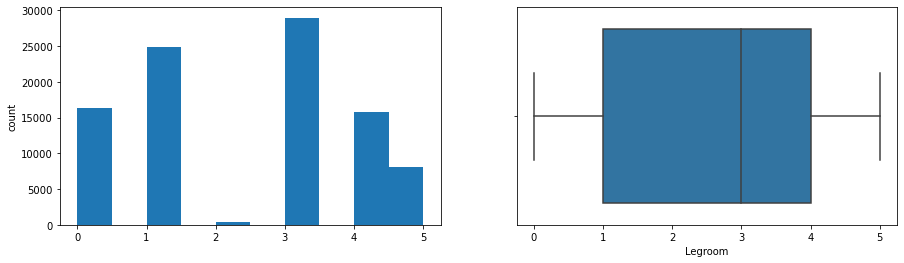

Baggage_Handling
Skew : 0.32


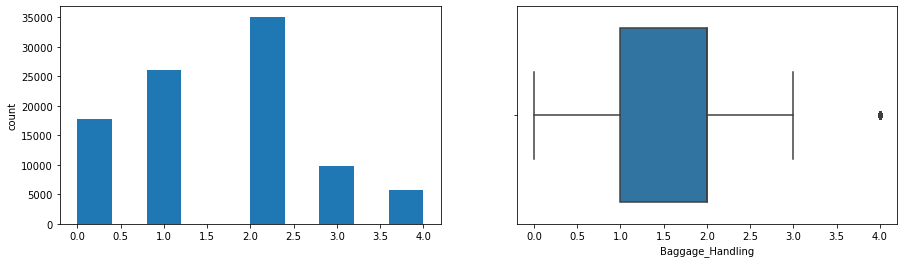

CheckIn_Service
Skew : 0.17


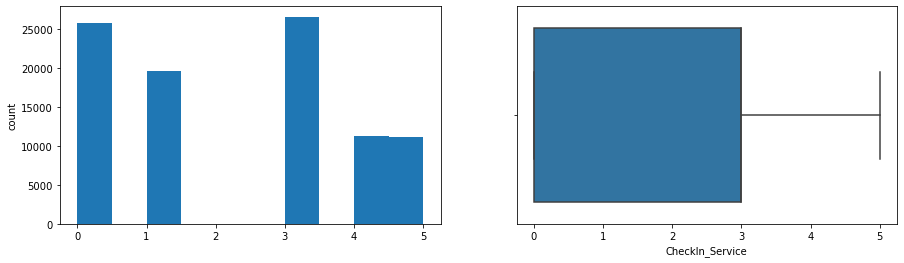

Cleanliness
Skew : 0.07


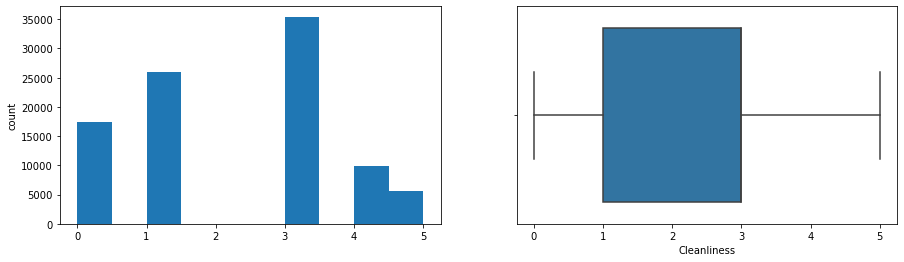

Online_Boarding
Skew : 0.11


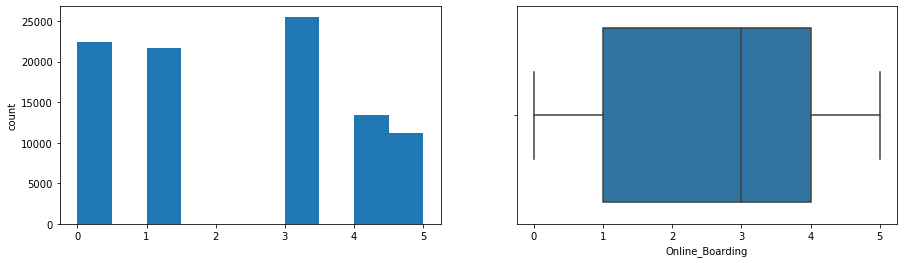

Gender_Female
Skew : -0.03


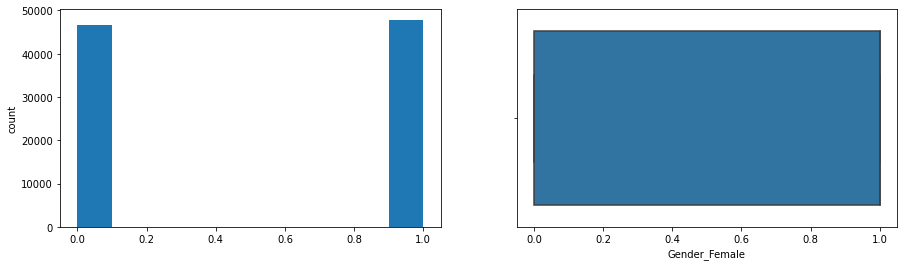

Gender_Male
Skew : 0.03


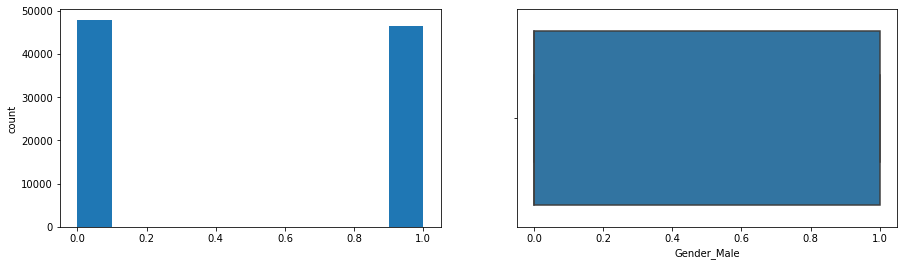

Customer_Type_Disloyal Customer
Skew : 1.8


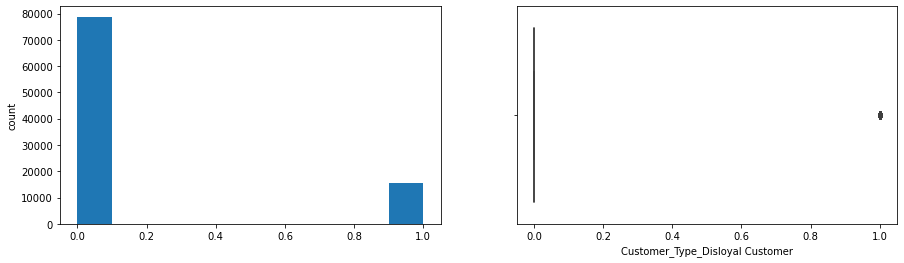

Customer_Type_Loyal Customer
Skew : -1.09


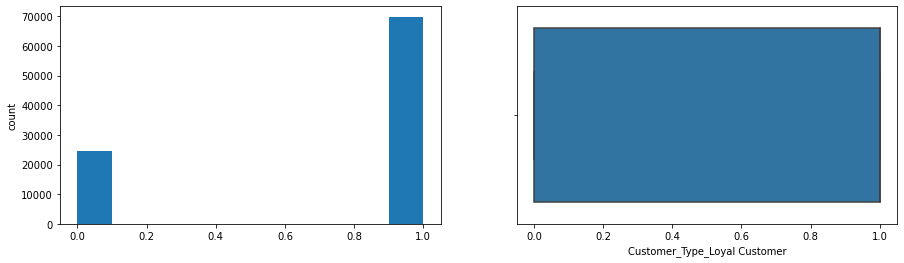

Type_Travel_Business Travel
Skew : -0.5


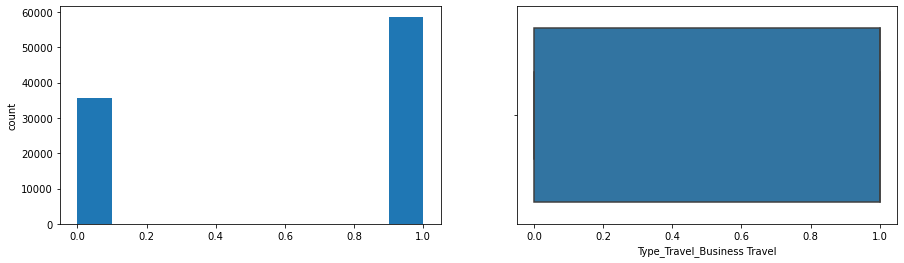

Type_Travel_Personal Travel
Skew : 0.97


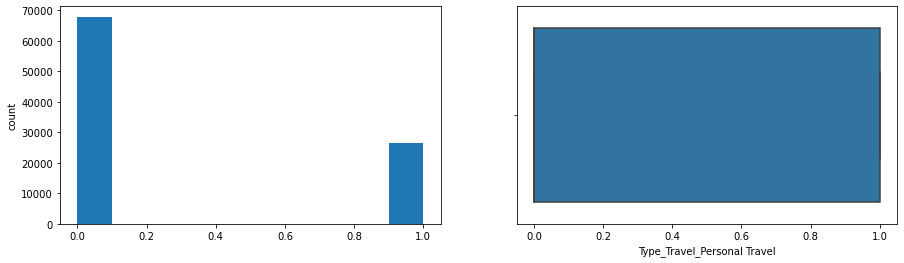

Travel_Class_Business
Skew : 0.09


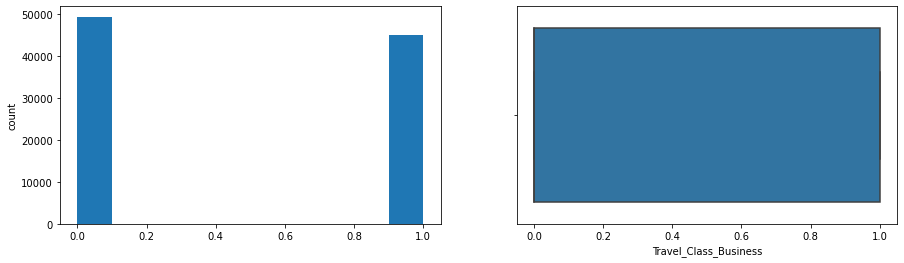

Travel_Class_Eco
Skew : -0.09


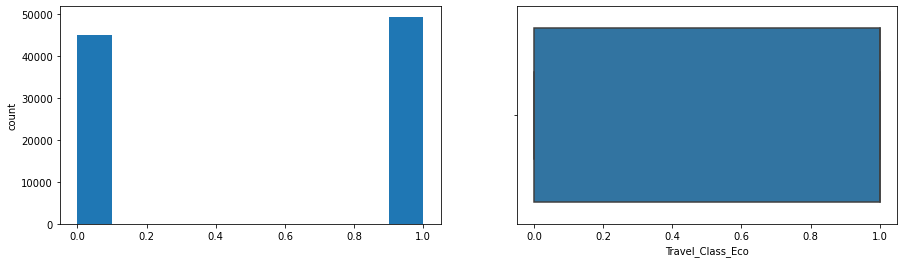

Seat_Class_Green Car
Skew : -0.01


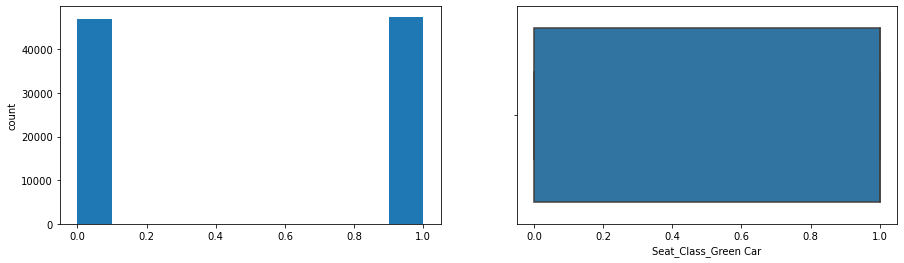

Seat_Class_Ordinary
Skew : 0.01


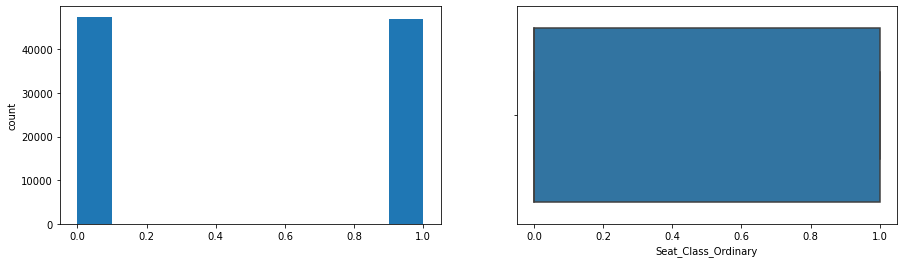

In [ ]:
# Create multiple histogram and boxplot for dataset
cont_cols = list(df_train_f.columns)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(df_train_f[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    df_train_f[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df_train_f[col])
    
    plt.show()

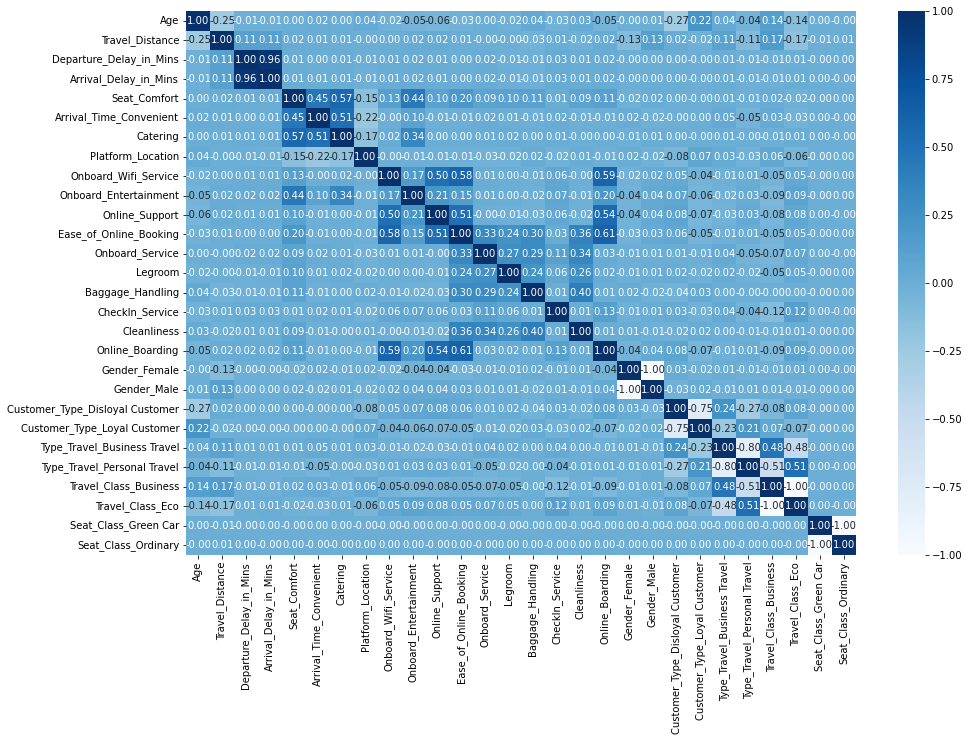

In [ ]:
# heat map shows that some variables are weakly positively correlated and some are strongly negatively correlated
plt.figure(figsize = (15, 10))

sns.heatmap(df_train_f.corr(), annot = True, fmt = '0.2f', cmap="Blues")

plt.show()

In [ ]:
# Drop the strongly correlated columns to avoid collinearity -> especially these perfectly correlated columns like gender, departure/arrival
df_train_f=df_train_f.drop(columns=['Arrival_Delay_in_Mins','Gender_Male','Type_Travel_Personal Travel','Travel_Class_Eco','Seat_Class_Ordinary'],axis=1)

In [ ]:
# Train-test split the test size to be 0.2
X_train,X_valid,y_train_f,y_valid_f=train_test_split(df_train_f,y_train,train_size=0.8,test_size=0.2,random_state=100)

In [ ]:
# default randomforest
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=100)
rf_model.fit(X_train,y_train_f)
y_pred=rf_model.predict(X_valid)

In [ ]:
from pandas._libs.hashtable import value_count
y_train.value_counts()

1    51593
0    42786
Name: Overall_Experience_1, dtype: int64

In [ ]:
X_train.shape

(75503, 23)

In [ ]:
df_train_f.shape

(94379, 23)

In [ ]:
#creating metric function 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8544
           1       0.96      0.95      0.95     10332

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



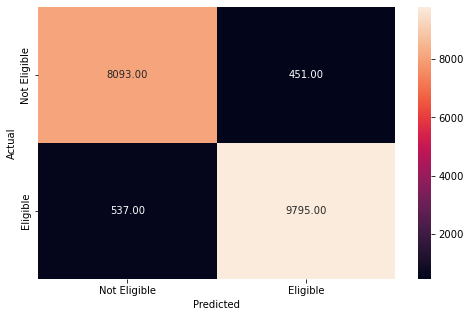

In [ ]:
#0.95 Accuracy!
metrics_score(y_valid_f, y_pred)

In [ ]:
accuracy_score(y_valid_f, y_pred)

0.9476584022038568

### **Tuned Random Forest Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Best RF classifier
rf_estimator_tuned = RandomForestClassifier(criterion='entropy', 
                                            class_weight= {0: 0.3, 1: 0.7},
                                            max_features= 0.5,
                                            )


# # Grid of parameters to choose from
# parameters = {'class_weight': [{0: 0.5, 1: 0.5},{0: 0.3, 1: 0.7}],
#              }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(accuracy_score, pos_label = 1)

# # Run the grid search
# grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

# # fit the GridSearch on train dataset
# grid_obj = grid_obj.fit(X_train, y_train_f)

# # Set the clf to the best combination of parameters
# rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train_f)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_features=0.5)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8544
           1       0.96      0.95      0.96     10332

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



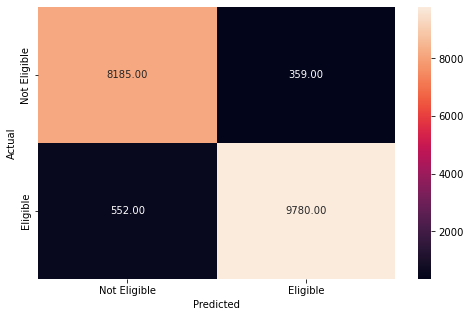

0.9517376562831108


In [ ]:
y_pred = rf_estimator_tuned.predict(X_valid)
metrics_score(y_valid_f, y_pred)
print(accuracy_score(y_valid_f, y_pred))

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train,X_valid,y_train_f,y_valid_f=train_test_split(df_train_f,y_train,train_size=0.8,test_size=0.2,random_state=100)

In [ ]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.5, 1: 0.5},criterion='entropy',min_samples_leaf=11,max_depth=16)

# Grid of parameters to choose from
parameters = {
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(accuracy_score)

# # Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer)

# # Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train_f)

# # Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train_f)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=16, min_samples_leaf=11)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      8544
           1       0.94      0.93      0.94     10332

    accuracy                           0.93     18876
   macro avg       0.93      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876



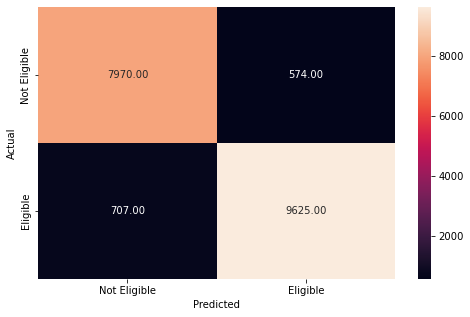

0.9321360457724094


In [ ]:
y_pred = d_tree_tuned.predict(X_valid)
metrics_score(y_valid_f, y_pred)
print(accuracy_score(y_valid_f, y_pred))

### **Use the Correct Model to predict the test set**

In [ ]:
#drop columns for test dataset
df_test_f=df_test_f.drop(columns=['Arrival_Delay_in_Mins','Gender_Male','Type_Travel_Personal Travel','Travel_Class_Eco','Seat_Class_Ordinary'],axis=1)

In [ ]:
y_pred_test=d_tree_tuned.predict(df_test_f)

In [ ]:
y_pred_test.shape

(35602,)

In [ ]:
df_test_f.shape

(35602, 23)

In [ ]:
df_test_f["pred"]=y_pred_test

In [ ]:
df_submission=df_test_f[["pred"]]

In [ ]:
#df_submission.set_index("ID",inplace=True)

In [ ]:
df_submission.rename(columns={"pred":"Overall_Experience"},inplace=True)

In [1]:
#df_submission.to_csv('submission_6.csv')